# Predicting Google Stock Price Trend Using RNN (LSTM)
This notebook implements the RNN and use it to make predictions on trends about google stock prices in future.

### Setting up the tool box:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


### Preprocessing data:

In [2]:
#loading data 
data=pd.read_csv("/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv")

#feature selection and turning data into numpy array
train_data=data.iloc[:,1:2].to_numpy()

#feature scalling
sc=MinMaxScaler(feature_range=(0,1))
scaled_train_data=sc.fit_transform(train_data)

#creating DS with 60 timestamps and 1 output for train & val split
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(scaled_train_data[i-60:i,0])
    y_train.append(scaled_train_data[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

#converting data into 3d tensors so that model accepts it
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

### Modeling:

In [7]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0353
Epoch 2/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0054
Epoch 5/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0053
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0061
Epoch 7/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0052
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 8s 7ms/step - l

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014


### Predictions and Visualizing the Results:

In [14]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/kaggle/input/google-stock-price/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



In [15]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

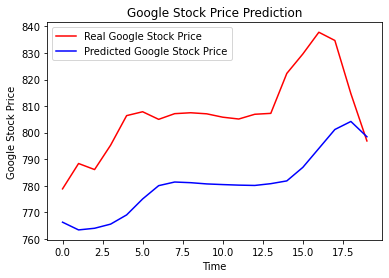

In [16]:
plt.plot(actual_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.xticks([arange()])
plt.show()